<b><h1 align="center">Intervalo de Confiança</h1><b>

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

<p align="left"><b>Autor:</b> Yuri José Soares de Araújo</p>

<p align="left"><b>Matrícula:</b> 1520658</p>

<p align="left"><b>Curso:</b> Engenharia de Computação</p>

&nbsp;

&nbsp;

&nbsp;

&nbsp;

<p align="center"> Fortaleza, 1 de Dezembro de 2018</p>

&nbsp;

&nbsp;

&nbsp;

&nbsp;

<h1 align="center">Introdução</h1>

<p align="left">Um <b>intervalo de confiança</b> é um conjunto de valores baseados em uma estimativa que contem a população em um certo nível de confiança</p>

<p align="left"><b>Confiança</b> é um conceito importante em estatística. Algumas vezes seu significado pode ser confundido. Informalmente, o nivel de confiança não representa a "probabilidade de estar certo"; Ao invés disso, representa com que frequência a resposta obtida será precisa. Por exemplo, se você quer 95% de chance de capturar a verdadeira população usando apenas uma estimativa, nós precisamos usar nosso nivel de confiança com 95%.</p>

<p align="left">Calcular o intervalo de confiança envolve encontrar uma estimativa, e então, incorporar a margem de erro para criar um intervalo. A <b>margem de erro</b> é um valor que representa a nossa certeza que a nossa estimativa é precisa e baseada no nível de confiança desejada, a variância dos dados e o quão grande sua amostra é.</p>

In [19]:
import numpy as np
import pandas as pd
import seaborn as sb
import math
from scipy.special import comb
from scipy.stats import binom

In [2]:
df_test = pd.read_csv('../data/drugsComTest_raw.tsv', sep='\t')
df_train = pd.read_csv('../data/drugsComTrain_raw.tsv', sep='\t')

In [3]:
df_test.head()

,drugName,condition,review,rating,date,usefulCount
0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3.0,"October 28, 2015",4
1,Medroxyprogesterone,Birth Control,"""This is a horrible shot!! I got my first shot...",1.0,"October 24, 2015",3
2,Medroxyprogesterone,Birth Control,"""I&#039;m 24 and I&#039;ve been on this for ab...",9.0,"October 16, 2015",7
3,Medroxyprogesterone,Endometriosis,"""I loved how convenient this was, one shot eve...",3.0,"October 15, 2015",4
4,Medroxyprogesterone,Birth Control,"""I took this shot to be safe, I&#039;m a young...",7.0,"October 14, 2015",5


In [4]:
df_train.head()

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


<b>1a Questão</b>

In [5]:
def bin_distr(n, p, x):
    ncr = comb(n, x)
    return (ncr*(pow(p, x))*pow((1-p),(n-x)))

/anaconda3/envs/confidence-interval-statistics/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0.5, 'Frequência'), Text(0.5, 0, 'Evento')]

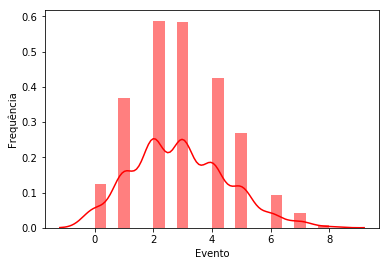

In [6]:
n, p = 20, 0.15
data = binom.rvs(n,p,loc=0, size=1000)
ax = sb.distplot(data,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 1,'alpha':0.50})
ax.set(xlabel='Evento', ylabel='Frequência')

<b>a)</b>

In [7]:
print(f'A probabilidade de zero tanques apresentarem vazamento é de {float(bin_distr(n, p, 0)*100):.2f}%.')

A probabilidade de zero tanques apresentarem vazamento é de 3.88%.


<b>b)</b>

In [8]:
prob = 0
for i in range(0,5):
    prob += bin_distr(n, p, i)

In [9]:
print(f'A probabilidade de menos de 5 tanques apresentarem vazamento é de {(float(prob)*100):.2f}%.')

A probabilidade de menos de 5 tanques apresentarem vazamento é de 82.98%.


<b>c)</b>

In [10]:
prob = 0
for i in range(0,10):
    prob += bin_distr(n, p, i)

In [11]:
print(f'A probabilidade de pelo menos 10 tanques apresentarem vazamento é de {(float(1-prob)*100):.2f}%.')

A probabilidade de pelo menos 10 tanques apresentarem vazamento é de 0.02%.


<b>d)</b>

In [12]:
prob = 0
for i in range(0,6):
    prob += bin_distr(n, p, i)

In [13]:
print(f'A probabilidade de no máximo 5 tanques apresentarem vazamento é de {(float(prob)*100):.2f}%.')

A probabilidade de no máximo 5 tanques apresentarem vazamento é de 93.27%.


<b>e)</b>

In [14]:
prob = 0
for i in range(4,7):
    prob += bin_distr(n, p, i)

In [15]:
print(f'A probabilidade de menos de 7 e mais de 3 tanques apresentarem vazamento é de {(float(prob)*100):.2f}%.')

A probabilidade de menos de 7 e mais de 3 tanques apresentarem vazamento é de 33.03%.


In [16]:
prob = 0
for i in range(3,8):
    prob += bin_distr(n, p, i)

In [17]:
print(f'A probabilidade de 7 a 3 tanques apresentarem vazamento é de {(float(prob)*100):.2f}%.')

A probabilidade de 7 a 3 tanques apresentarem vazamento é de 58.92%.


<b>2a Questão</b>

In [25]:
def pois_distr(u, x):
    return ((math.exp(-u)*pow(u, x))/math.factorial(x))

<b>a)</b>

In [33]:
print(f'A probabilidade de que não ocorra nenhum defeito é de {float(pois_distr(4, 0))*100:.2f}%.')

A probabilidade de que não ocorra nenhum defeito é de 1.83%.


<b>b)</b>

In [36]:
prob = 0
for i in range(0,4):
    prob += pois_distr(4, i)

In [41]:
print(f'A probabilidade de que aconteça no máximo 3 defeitos é de {float(prob)*100:.2f}%.')

A probabilidade de que aconteça no máximo 3 defeitos é de 62.88%.


<b>c)</b>

In [40]:
prob = 0
for i in range(0,5):
    prob += pois_distr(4, i)

In [47]:
print(f'A probabilidade de que aconteça pelo menos 5 defeitos é de {float(1-prob)*100:.2f}%.')

A probabilidade de que aconteça pelo menos 5 defeitos é de 100.00%.


<b>d)</b>

In [59]:
prob = 0
for i in range(1,18):
    prob += pois_distr(2, i)

In [56]:
print(f'A probabilidade de que pelo menos 3 não tenha defeitos em 10 peças de 500m é de {float(1-prob)*100:.2f}%.')

A probabilidade de que aconteça pelo menos 3 defeitos em 10 peças de 500m é de 70.30%.


In [60]:
float(prob)

0.9816841129336638

In [61]:
pois_distr(2, 0)

0.1353352832366127